#  Анализ бейсбольных саберметрик

#### Для проекта возьму базы данных результатов игроков MLB - Главной бейсбольной лиги за 2019 год,поскольку в 2020 году сезон был сокращён и не все игроки принимали участие.
#### Попробую построить модели на разных алгоритмах и посмотрю как они будут себя вести.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#### Саберметрики игроков-бэттеров.

In [2]:
df = pd.read_csv('D:/Data/mlb-player-stats-Batters.csv')
df

,Player,Team,Pos,Age,G,AB,R,H,2B,3B,...,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
0,Whit Merrifield,KC,2B,32,162,681,105,206,41,10,...,10,45,126,0,4,5,0.302,0.348,0.463,0.811
1,Marcus Semien,OAK,SS,30,162,657,123,187,43,7,...,8,87,102,0,1,2,0.285,0.369,0.522,0.891
2,Rafael Devers,BOS,3B,24,156,647,129,201,54,4,...,8,48,119,1,2,4,0.311,0.361,0.555,0.916
3,Jonathan Villar,BAL,2B,29,162,642,111,176,33,5,...,9,61,176,2,4,4,0.274,0.339,0.453,0.792
4,Ozzie Albies,ATL,2B,24,160,640,102,189,43,8,...,4,54,112,0,4,4,0.295,0.352,0.500,0.852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,Jose Rondon,BAL,2B,26,1,1,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0.000
690,Travis d'Arnaud,LAD,C,32,1,1,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0.000
691,Aaron Altherr,SF,OF,30,1,1,0,0,0,0,...,0,0,1,0,0,0,0.000,0.000,0.000,0.000
692,Rob Brantly,PHI,C,31,1,1,0,0,0,0,...,0,0,1,0,0,0,0.000,0.000,0.000,0.000


#### Есть игроки,которые выходили на поле по одному разу и не показали результатов.


In [3]:
df.columns

Index(['Player', 'Team', 'Pos', 'Age', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG',
       'OPS'],
      dtype='object')

#### В бейсболе используется очень много разных метрик для оценки эффективности игроков.
#### Мне все не нужны,оставлю только самые значимые

##### Player
##### Team
##### Age
##### G - количество игр,в кот. участвовал игрок
##### H - количество хитов,ударов,в рез. которых игрок попадает на базы
##### AB - число выходов на биту
##### RBI - количество очков,полученные командой в рез.действий игрока
##### HR - количество хоумранов,выбивание мяча за пределы поля
##### AVG - средний процент отбивания
##### OBP - процент достижения первой базы
##### SLG - коэффициент общей эффективности игрока,отношение количества достигнутых баз к количеству выходов на биту

In [4]:
df.drop(['Pos','R','2B','3B','SB','CS','BB','SO','SH','SF','HBP','OPS'], axis=1, inplace=True)
df

,Player,Team,Age,G,AB,H,HR,RBI,AVG,OBP,SLG
0,Whit Merrifield,KC,32,162,681,206,16,74,0.302,0.348,0.463
1,Marcus Semien,OAK,30,162,657,187,33,92,0.285,0.369,0.522
2,Rafael Devers,BOS,24,156,647,201,32,115,0.311,0.361,0.555
3,Jonathan Villar,BAL,29,162,642,176,24,73,0.274,0.339,0.453
4,Ozzie Albies,ATL,24,160,640,189,24,86,0.295,0.352,0.500
...,...,...,...,...,...,...,...,...,...,...,...
689,Jose Rondon,BAL,26,1,1,0,0,0,0.000,0.000,0.000
690,Travis d'Arnaud,LAD,32,1,1,0,0,0,0.000,0.000,0.000
691,Aaron Altherr,SF,30,1,1,0,0,0,0.000,0.000,0.000
692,Rob Brantly,PHI,31,1,1,0,0,0,0.000,0.000,0.000


#### Sabermetrics предполагает совокупный анализ данных,но это будет слишком большой объём работы ,поэтому возьму только 2 показателя. 
#### Для бэттеров определю целевой переменной AVG, самый важный показатель эффективности.


#### Есть нулевые значения целевых переменных.Чтобы MAPE не улетало в бесконечность, можно применить несколько способов. 
#### Самым оптимальным с лучшим показателем MAPE оказался самый простой - удаление нулевых значений.

In [5]:
df=df[df['AVG'] > 0]
df

,Player,Team,Age,G,AB,H,HR,RBI,AVG,OBP,SLG
0,Whit Merrifield,KC,32,162,681,206,16,74,0.302,0.348,0.463
1,Marcus Semien,OAK,30,162,657,187,33,92,0.285,0.369,0.522
2,Rafael Devers,BOS,24,156,647,201,32,115,0.311,0.361,0.555
3,Jonathan Villar,BAL,29,162,642,176,24,73,0.274,0.339,0.453
4,Ozzie Albies,ATL,24,160,640,189,24,86,0.295,0.352,0.500
...,...,...,...,...,...,...,...,...,...,...,...
668,Jacob Nottingham,MIL,25,9,6,2,1,4,0.333,0.429,0.833
669,Nick Ciuffo,TB,25,3,6,1,0,0,0.167,0.167,0.167
675,Anthony Bemboom,TB,31,3,5,2,0,1,0.400,0.400,0.600
676,Johnny Davis,TB,30,8,4,1,0,0,0.250,0.250,0.750


#### Второй датасет-показатели питчеров.

In [6]:
data = pd.read_csv('D:/Data/mlb-player-stats-Pitchers.csv')
data

,Player,Team,Age,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP
0,Justin Verlander,HOU,37,34,34,2,1,223.0,137,64,300,42,36,21,6,0,0,0,2.58,0.80
1,Shane Bieber,CLE,25,34,33,3,2,214.1,186,78,259,40,31,15,8,0,0,0,3.28,1.05
2,Gerrit Cole,HOU,30,33,33,0,0,212.1,142,59,326,48,29,20,5,0,0,0,2.50,0.89
3,Stephen Strasburg,WAS,32,33,33,0,0,209.0,161,77,251,56,24,18,6,0,0,0,3.32,1.04
4,Mike Minor,TEX,33,32,32,2,1,208.1,190,83,200,68,30,14,10,0,0,0,3.59,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,Deolis Guerra,MIL,31,1,0,0,0,0.2,4,4,0,0,1,0,0,0,0,0,54.00,6.00
868,Dellin Betances,NYY,32,1,0,0,0,0.2,0,0,2,0,0,0,0,0,0,0,0.00,0.00
869,Jose Castillo,SD,25,1,0,0,0,0.2,0,0,2,1,0,0,0,0,0,0,0.00,1.50
870,Austen Williams,WAS,28,2,0,0,0,0.1,5,6,1,1,2,0,0,0,0,0,162.00,18.00


In [7]:
data.columns

Index(['Player', 'Team', 'Age', 'G', 'GS', 'CG', 'SHO', 'IP', 'H', 'ER', 'K',
       'BB', 'HR', 'W', 'L', 'SV', 'BS', 'HLD', 'ERA', 'WHIP'],
      dtype='object')

#### Так же оставлю самые важные показатели.

##### Player
##### Team
##### Age
##### G - количество проведённых игр
##### IP - количество сыгранных иннингов
##### H - количество пропущенных хитов
##### ER - кол.-во пропущенных очков
##### K - кол.-во сделанных страйкаутов
##### W - число побед
##### L - число поражений
##### ERA - среднее кол.-во пропущенных очков за 9 иннингов

In [8]:
data.drop(['GS','CG','SHO','BB','HR','SV','BS','HLD','WHIP'], axis=1, inplace=True)
data

,Player,Team,Age,G,IP,H,ER,K,W,L,ERA
0,Justin Verlander,HOU,37,34,223.0,137,64,300,21,6,2.58
1,Shane Bieber,CLE,25,34,214.1,186,78,259,15,8,3.28
2,Gerrit Cole,HOU,30,33,212.1,142,59,326,20,5,2.50
3,Stephen Strasburg,WAS,32,33,209.0,161,77,251,18,6,3.32
4,Mike Minor,TEX,33,32,208.1,190,83,200,14,10,3.59
...,...,...,...,...,...,...,...,...,...,...,...
867,Deolis Guerra,MIL,31,1,0.2,4,4,0,0,0,54.00
868,Dellin Betances,NYY,32,1,0.2,0,0,2,0,0,0.00
869,Jose Castillo,SD,25,1,0.2,0,0,2,0,0,0.00
870,Austen Williams,WAS,28,2,0.1,5,6,1,0,0,162.00


#### Для питчеров самый важный показатель эффективности - ERA.
#### Удаляю нулевые значения ERA

In [9]:
data=data[data['ERA'] > 0]
data

,Player,Team,Age,G,IP,H,ER,K,W,L,ERA
0,Justin Verlander,HOU,37,34,223.0,137,64,300,21,6,2.58
1,Shane Bieber,CLE,25,34,214.1,186,78,259,15,8,3.28
2,Gerrit Cole,HOU,30,33,212.1,142,59,326,20,5,2.50
3,Stephen Strasburg,WAS,32,33,209.0,161,77,251,18,6,3.32
4,Mike Minor,TEX,33,32,208.1,190,83,200,14,10,3.59
...,...,...,...,...,...,...,...,...,...,...,...
865,James Bourque,WAS,27,1,0.2,3,4,0,0,0,54.00
866,Pedro Araujo,BAL,27,1,0.2,2,2,0,0,0,27.00
867,Deolis Guerra,MIL,31,1,0.2,4,4,0,0,0,54.00
870,Austen Williams,WAS,28,2,0.1,5,6,1,0,0,162.00



#### Буду поочерёдно работать с этими двумя датасетами

In [10]:
df.isnull().sum() 

Player    0
Team      0
Age       0
G         0
AB        0
H         0
HR        0
RBI       0
AVG       0
OBP       0
SLG       0
dtype: int64

In [11]:
data.isnull().sum() 

Player    0
Team      0
Age       0
G         0
IP        0
H         0
ER        0
K         0
W         0
L         0
ERA       0
dtype: int64

#### Пропущенных значений нет

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 0 to 678
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  665 non-null    object 
 1   Team    665 non-null    object 
 2   Age     665 non-null    int64  
 3   G       665 non-null    int64  
 4   AB      665 non-null    int64  
 5   H       665 non-null    int64  
 6   HR      665 non-null    int64  
 7   RBI     665 non-null    int64  
 8   AVG     665 non-null    float64
 9   OBP     665 non-null    float64
 10  SLG     665 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 62.3+ KB


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 0 to 871
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  851 non-null    object 
 1   Team    851 non-null    object 
 2   Age     851 non-null    int64  
 3   G       851 non-null    int64  
 4   IP      851 non-null    float64
 5   H       851 non-null    int64  
 6   ER      851 non-null    int64  
 7   K       851 non-null    int64  
 8   W       851 non-null    int64  
 9   L       851 non-null    int64  
 10  ERA     851 non-null    float64
dtypes: float64(2), int64(7), object(2)
memory usage: 79.8+ KB


#### Датасеты небольшие,размерность оставлю 64

In [14]:
df.describe(percentiles=[.25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Age,665.0,29.448120,3.676378,21.000,27.000,29.000,32.000,35.0000,37.0000,38.36000,41.000
G,665.0,75.329323,49.679437,2.000,28.000,73.000,121.000,146.0000,154.8000,161.00000,162.000
AB,665.0,243.521805,189.239855,4.000,65.000,209.000,403.000,529.6000,575.8000,634.72000,681.000
H,665.0,62.339850,53.403262,1.000,14.000,49.000,103.000,145.6000,161.0000,186.36000,206.000
HR,665.0,10.153383,10.857397,0.000,1.000,6.000,16.000,27.0000,33.0000,41.00000,53.000
RBI,665.0,33.436090,30.648305,0.000,7.000,25.000,55.000,79.0000,92.0000,117.00000,126.000
AVG,665.0,0.234220,0.057726,0.034,0.207,0.243,0.271,0.2946,0.3110,0.34616,0.500
OBP,665.0,0.303771,0.065347,0.059,0.276,0.313,0.343,0.3716,0.3906,0.42900,0.625
SLG,665.0,0.396337,0.122105,0.045,0.324,0.410,0.473,0.5392,0.5760,0.66076,0.833


In [15]:
data.describe(percentiles=[.25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Age,851.0,29.571093,3.534777,20.00,27.00,29.00,32.00,35.00,36.00,38.00,43.0
G,851.0,25.000000,19.494373,1.00,9.00,21.00,34.00,57.00,66.00,73.00,83.0
IP,851.0,50.594595,49.982299,0.10,14.00,35.10,66.60,133.10,171.65,203.05,223.0
H,851.0,49.191539,47.605558,0.00,15.00,34.00,63.00,127.00,159.00,194.50,225.0
ER,851.0,25.437133,23.160194,1.00,8.00,18.00,33.00,64.00,77.00,92.50,110.0
K,851.0,50.206816,51.990854,0.00,13.00,33.00,70.00,118.00,158.00,238.00,326.0
W,851.0,2.851939,3.717264,0.00,0.00,1.00,4.00,8.00,11.00,16.00,21.0
L,851.0,2.851939,3.248410,0.00,0.00,2.00,4.00,8.00,10.00,13.50,17.0
ERA,851.0,6.047086,7.762655,0.49,3.72,4.78,6.43,9.15,11.59,27.00,162.0


#### Построю heatmap,посмотрю корреляцию
##### бэттеры

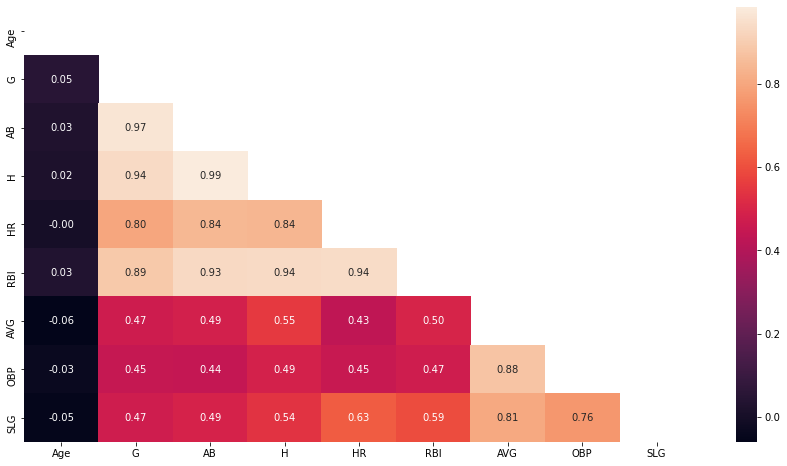

In [16]:
plt.figure(figsize=(15,8));
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, fmt='.2f', mask=mask);

##### питчеры

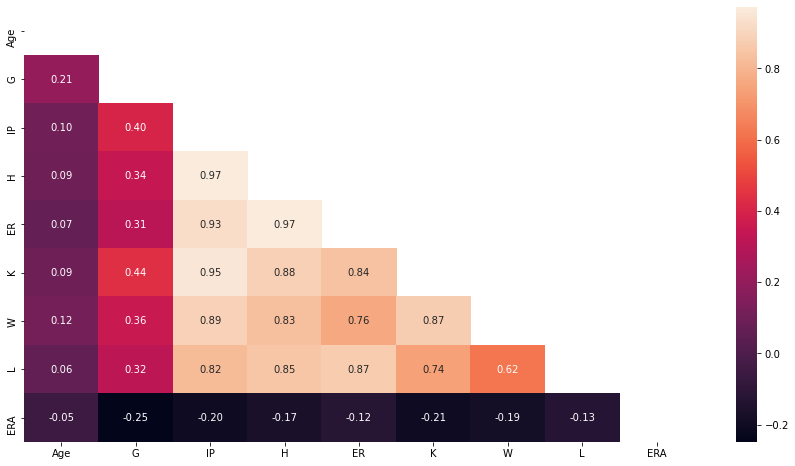

In [17]:
plt.figure(figsize=(15,8));
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), annot=True, fmt='.2f', mask=mask);

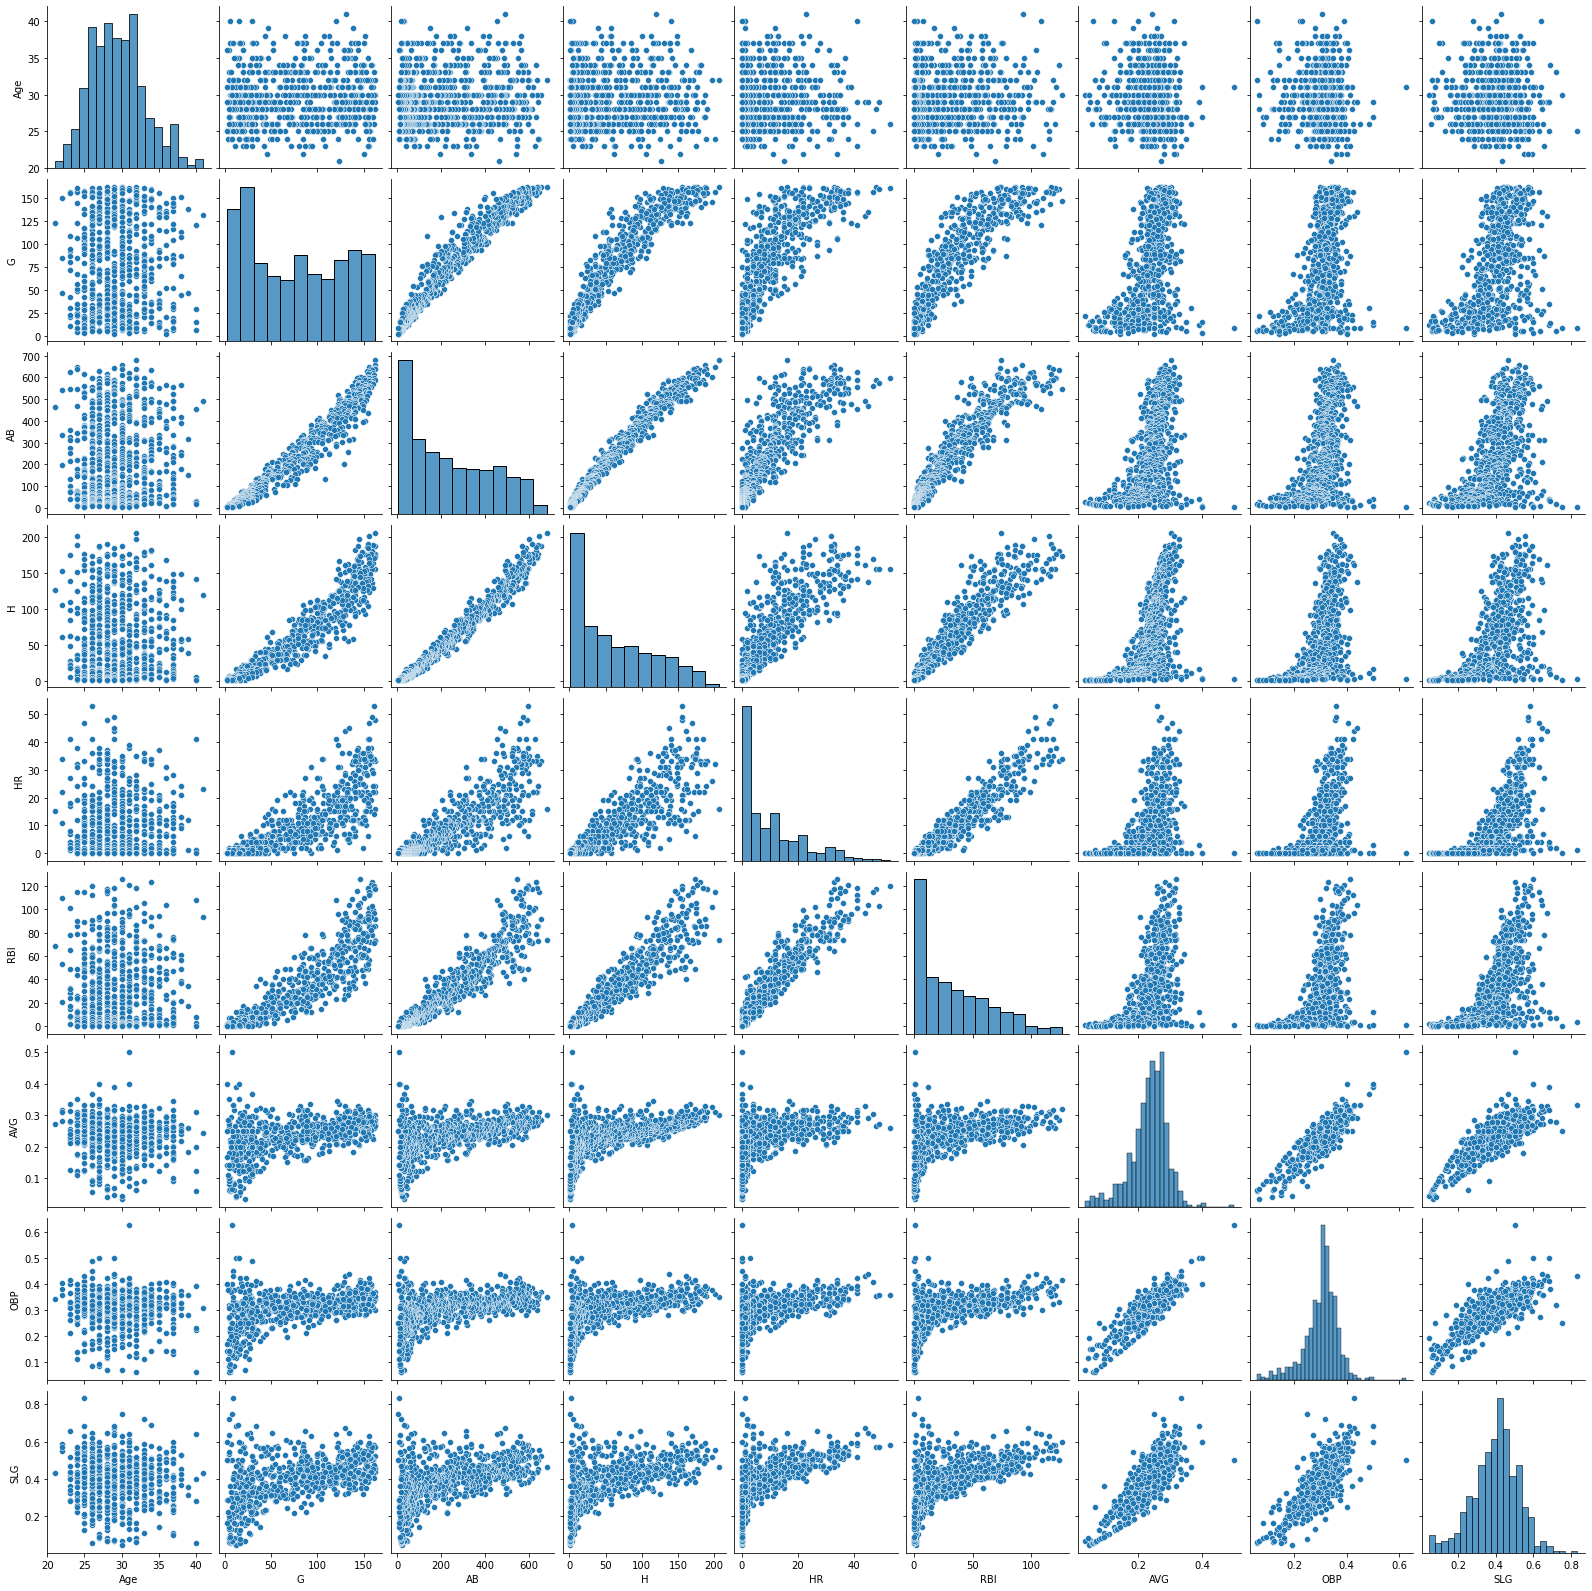

In [18]:
sns.pairplot(df)

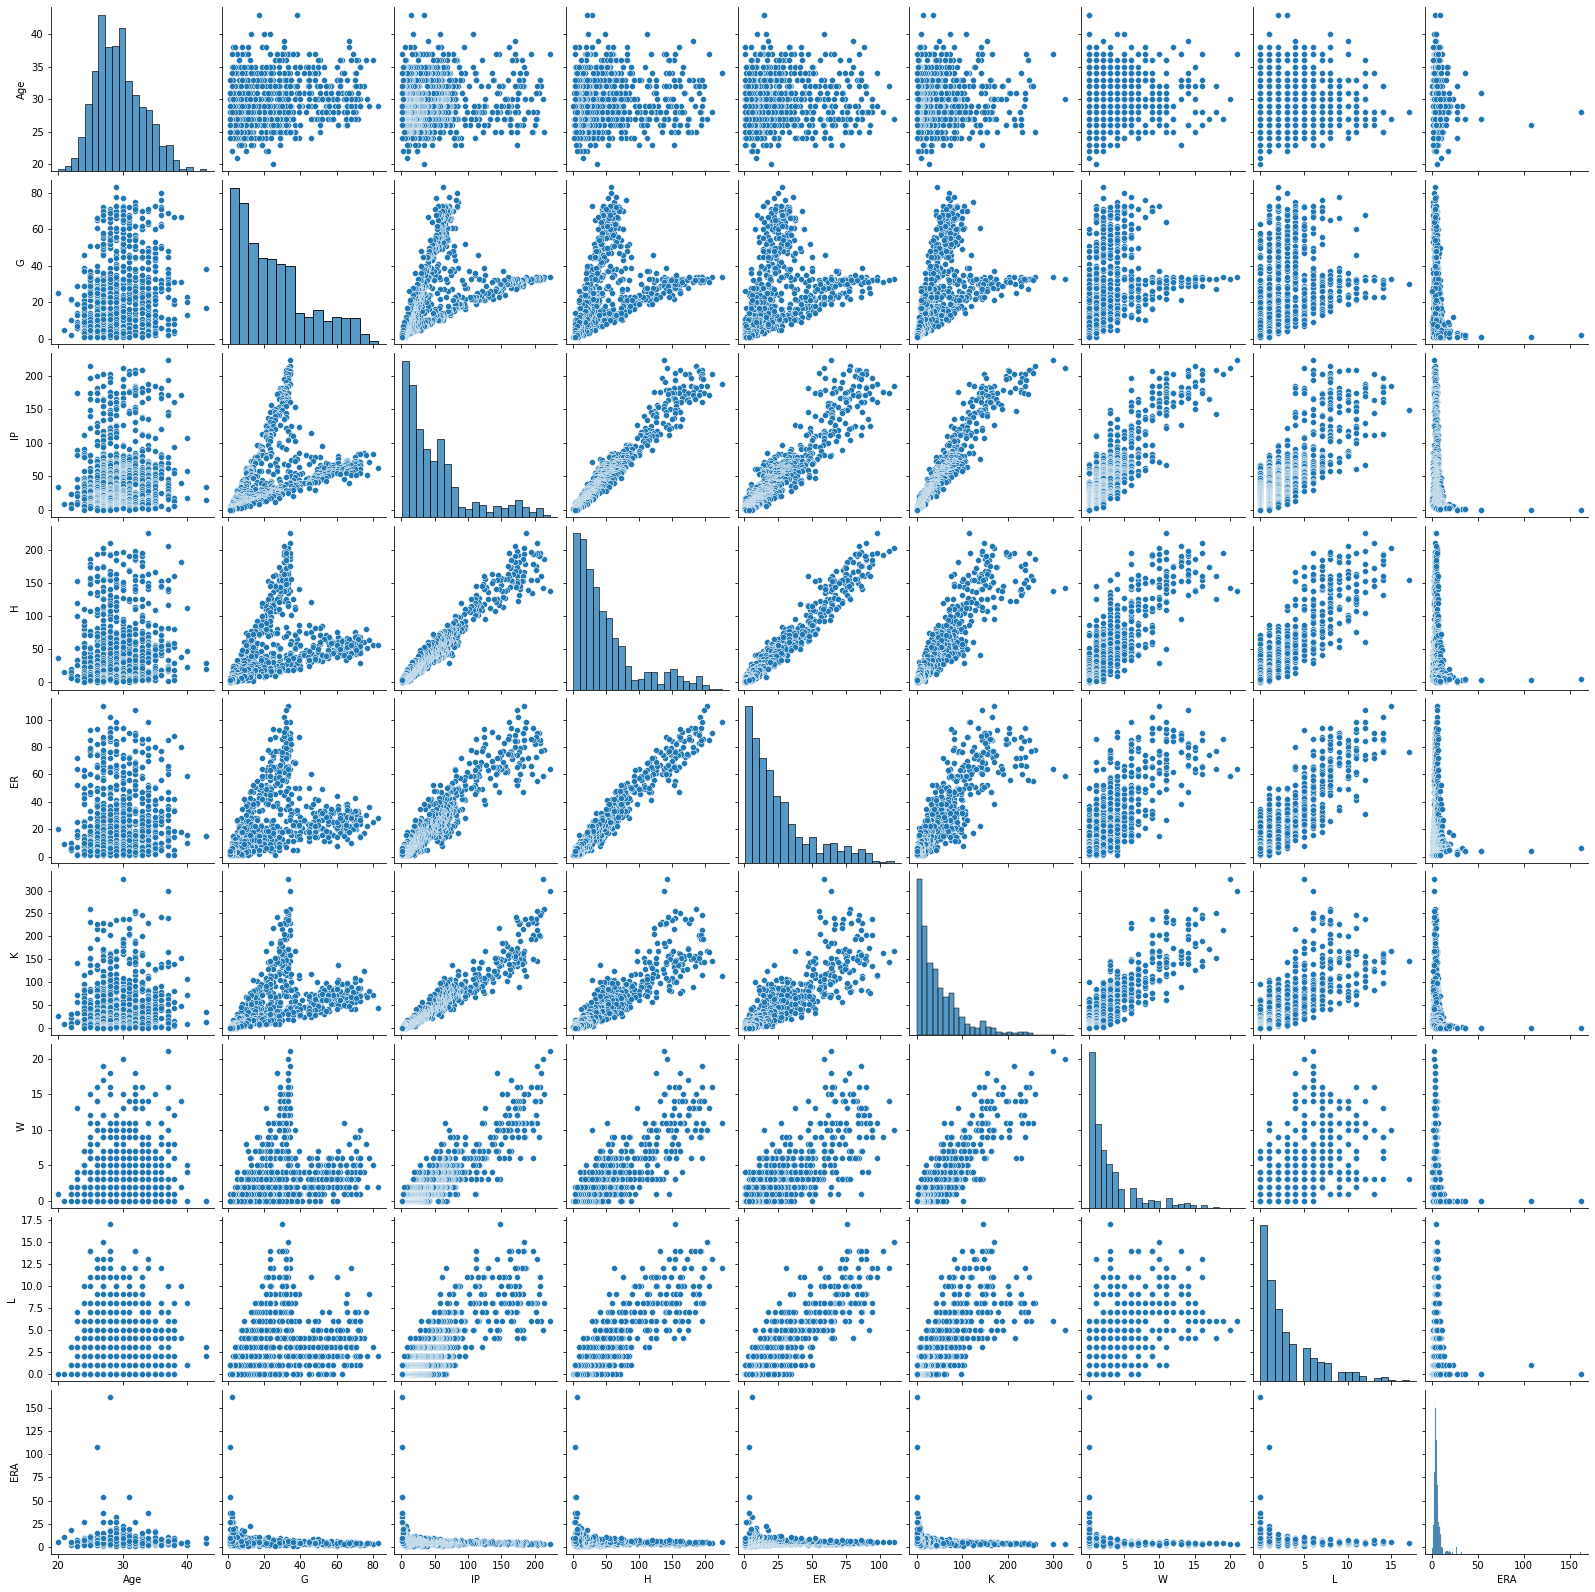

In [19]:
sns.pairplot(data)

#### Действительно отражается реальное влияние коэффициентов друг на друга

#### Для дальнейшего анализа и стандартизации удалю текстовые столбцы

In [20]:
df1 = df.drop(['Player','Team'], axis=1)
df1

,Age,G,AB,H,HR,RBI,AVG,OBP,SLG
0,32,162,681,206,16,74,0.302,0.348,0.463
1,30,162,657,187,33,92,0.285,0.369,0.522
2,24,156,647,201,32,115,0.311,0.361,0.555
3,29,162,642,176,24,73,0.274,0.339,0.453
4,24,160,640,189,24,86,0.295,0.352,0.500
...,...,...,...,...,...,...,...,...,...
668,25,9,6,2,1,4,0.333,0.429,0.833
669,25,3,6,1,0,0,0.167,0.167,0.167
675,31,3,5,2,0,1,0.400,0.400,0.600
676,30,8,4,1,0,0,0.250,0.250,0.750


In [21]:
data1 = data.drop(['Player','Team'], axis=1)
data1

,Age,G,IP,H,ER,K,W,L,ERA
0,37,34,223.0,137,64,300,21,6,2.58
1,25,34,214.1,186,78,259,15,8,3.28
2,30,33,212.1,142,59,326,20,5,2.50
3,32,33,209.0,161,77,251,18,6,3.32
4,33,32,208.1,190,83,200,14,10,3.59
...,...,...,...,...,...,...,...,...,...
865,27,1,0.2,3,4,0,0,0,54.00
866,27,1,0.2,2,2,0,0,0,27.00
867,31,1,0.2,4,4,0,0,0,54.00
870,28,2,0.1,5,6,1,0,0,162.00


### ML


In [22]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def dataframe_metrics(y_test,y_pred):
    stats = [
       metrics.mean_absolute_error(y_test, y_pred),
       np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
       metrics.r2_score(y_test, y_pred),
       mean_absolute_percentage_error(y_test, y_pred)
    ]
    return stats


measured_metrics = pd.DataFrame({"error_type":["MAE", "RMSE", "R2", "MAPE"]})
measured_metrics.set_index("error_type")


""
error_type
MAE
RMSE
R2
MAPE


#### Начну с бэттеров

#### Разбиваю датасет на train-test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop(['AVG'], axis=1), df1.AVG,test_size=0.2)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((532, 8), (133, 8), (532,), (133,))

#### Шкалирую

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Построю модели на разных алгоритмах и посмотрю как они себя будут вести

#### Baseline

In [26]:
y_median = np.median(y_train)                   
y_pred_naive = np.ones(len(y_test)) * y_median  
y_pred_naive[:5]

array([0.241, 0.241, 0.241, 0.241, 0.241])

In [27]:
measured_metrics['naive_baseline'] = dataframe_metrics(y_test, y_pred_naive)

In [28]:
measured_metrics

,error_type,naive_baseline
0,MAE,0.042474
1,RMSE,0.058099
2,R2,-0.009690
3,MAPE,26.787219


#### LinearRegression 

In [29]:
Lr =LinearRegression()
Lr.fit(X_train, y_train)
measured_metrics['Lr'] = dataframe_metrics(y_test, Lr.predict(X_test))
measured_metrics

,error_type,naive_baseline,Lr
0,MAE,0.042474,0.013582
1,RMSE,0.058099,0.017595
2,R2,-0.009690,0.907400
3,MAPE,26.787219,6.883300


#### LassoCV

In [30]:
lasso_cv = LassoCV()
lasso_cv.fit(X_train, y_train)
measured_metrics['lasso_cv'] = dataframe_metrics(y_test, lasso_cv.predict(X_test))
measured_metrics

,error_type,naive_baseline,Lr,lasso_cv
0,MAE,0.042474,0.013582,0.013546
1,RMSE,0.058099,0.017595,0.017552
2,R2,-0.009690,0.907400,0.907844
3,MAPE,26.787219,6.883300,6.880806


#### RidgeCV

In [31]:
ridge_cv = RidgeCV()
ridge_cv.fit(X_train, y_train)
measured_metrics['ridge_cv'] = dataframe_metrics(y_test, ridge_cv.predict(X_test))
measured_metrics

,error_type,naive_baseline,Lr,lasso_cv,ridge_cv
0,MAE,0.042474,0.013582,0.013546,0.013583
1,RMSE,0.058099,0.017595,0.017552,0.017594
2,R2,-0.009690,0.907400,0.907844,0.907409
3,MAPE,26.787219,6.883300,6.880806,6.887658


#### ElasticNetCV 

In [32]:
elastic_cv = ElasticNetCV()
elastic_cv.fit(X_train, y_train)
measured_metrics['elastic_cv'] = dataframe_metrics(y_test, elastic_cv.predict(X_test))
measured_metrics

,error_type,naive_baseline,Lr,lasso_cv,ridge_cv,elastic_cv
0,MAE,0.042474,0.013582,0.013546,0.013583,0.013547
1,RMSE,0.058099,0.017595,0.017552,0.017594,0.017554
2,R2,-0.009690,0.907400,0.907844,0.907409,0.907830
3,MAPE,26.787219,6.883300,6.880806,6.887658,6.881987


#### RandomForest

In [33]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
measured_metrics['rf'] = dataframe_metrics(y_test, rf.predict(X_test))
measured_metrics

,error_type,naive_baseline,Lr,lasso_cv,ridge_cv,elastic_cv,rf
0,MAE,0.042474,0.013582,0.013546,0.013583,0.013547,0.015444
1,RMSE,0.058099,0.017595,0.017552,0.017594,0.017554,0.019864
2,R2,-0.009690,0.907400,0.907844,0.907409,0.907830,0.881976
3,MAPE,26.787219,6.883300,6.880806,6.887658,6.881987,7.272890


#### DecisionTree

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
tr =  DecisionTreeRegressor()
tr.fit(X_train, y_train)
measured_metrics['tr'] = dataframe_metrics(y_test, tr.predict(X_test))
measured_metrics

,error_type,naive_baseline,Lr,lasso_cv,ridge_cv,elastic_cv,rf,tr
0,MAE,0.042474,0.013582,0.013546,0.013583,0.013547,0.015444,0.021586
1,RMSE,0.058099,0.017595,0.017552,0.017594,0.017554,0.019864,0.030168
2,R2,-0.009690,0.907400,0.907844,0.907409,0.907830,0.881976,0.727764
3,MAPE,26.787219,6.883300,6.880806,6.887658,6.881987,7.272890,10.660476


#### GradientBoosting

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
gr =  GradientBoostingRegressor()
gr.fit(X_train, y_train)
measured_metrics['gr'] = dataframe_metrics(y_test, gr.predict(X_test))
measured_metrics

,error_type,naive_baseline,Lr,lasso_cv,ridge_cv,elastic_cv,rf,tr,gr
0,MAE,0.042474,0.013582,0.013546,0.013583,0.013547,0.015444,0.021586,0.013888
1,RMSE,0.058099,0.017595,0.017552,0.017594,0.017554,0.019864,0.030168,0.017587
2,R2,-0.009690,0.907400,0.907844,0.907409,0.907830,0.881976,0.727764,0.907480
3,MAPE,26.787219,6.883300,6.880806,6.887658,6.881987,7.272890,10.660476,6.542112


#### XGBoost

In [38]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [39]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
measured_metrics['xgb'] = dataframe_metrics(y_test, xgb.predict(X_test))
measured_metrics

,error_type,naive_baseline,Lr,lasso_cv,ridge_cv,elastic_cv,rf,tr,gr,xgb
0,MAE,0.042474,0.013582,0.013546,0.013583,0.013547,0.015444,0.021586,0.013888,0.012668
1,RMSE,0.058099,0.017595,0.017552,0.017594,0.017554,0.019864,0.030168,0.017587,0.016220
2,R2,-0.009690,0.907400,0.907844,0.907409,0.907830,0.881976,0.727764,0.907480,0.921300
3,MAPE,26.787219,6.883300,6.880806,6.887658,6.881987,7.272890,10.660476,6.542112,5.905923


#### Catboost

In [40]:
from catboost import CatBoostRegressor

In [41]:
ctb = CatBoostRegressor()
ctb.fit(X_train, y_train)
measured_metrics['ctb'] = dataframe_metrics(y_test, ctb.predict(X_test))
measured_metrics

Learning rate set to 0.034883
0:	learn: 0.0564677	total: 60.8ms	remaining: 1m
1:	learn: 0.0553148	total: 66ms	remaining: 32.9s
2:	learn: 0.0540843	total: 71ms	remaining: 23.6s
3:	learn: 0.0529624	total: 76.1ms	remaining: 18.9s
4:	learn: 0.0518924	total: 85.6ms	remaining: 17s
5:	learn: 0.0507958	total: 87.7ms	remaining: 14.5s
6:	learn: 0.0497864	total: 89.7ms	remaining: 12.7s
7:	learn: 0.0488849	total: 92.1ms	remaining: 11.4s
8:	learn: 0.0480002	total: 94.2ms	remaining: 10.4s
9:	learn: 0.0470670	total: 96.4ms	remaining: 9.54s
10:	learn: 0.0461575	total: 98.3ms	remaining: 8.84s
11:	learn: 0.0452891	total: 101ms	remaining: 8.29s
12:	learn: 0.0444572	total: 103ms	remaining: 7.81s
13:	learn: 0.0437160	total: 105ms	remaining: 7.38s
14:	learn: 0.0428914	total: 107ms	remaining: 7.02s
15:	learn: 0.0421913	total: 109ms	remaining: 6.7s
16:	learn: 0.0414552	total: 111ms	remaining: 6.42s
17:	learn: 0.0407492	total: 113ms	remaining: 6.18s
18:	learn: 0.0402022	total: 115ms	remaining: 5.95s
19:	learn:

,error_type,naive_baseline,Lr,lasso_cv,ridge_cv,elastic_cv,rf,tr,gr,xgb,ctb
0,MAE,0.042474,0.013582,0.013546,0.013583,0.013547,0.015444,0.021586,0.013888,0.012668,0.012389
1,RMSE,0.058099,0.017595,0.017552,0.017594,0.017554,0.019864,0.030168,0.017587,0.016220,0.015790
2,R2,-0.009690,0.907400,0.907844,0.907409,0.907830,0.881976,0.727764,0.907480,0.921300,0.925420
3,MAPE,26.787219,6.883300,6.880806,6.887658,6.881987,7.272890,10.660476,6.542112,5.905923,5.985148


#### LightGBM

In [42]:
import lightgbm as lgb

In [43]:
from lightgbm import LGBMRegressor

In [44]:
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
measured_metrics['lgb'] = dataframe_metrics(y_test, lgb.predict(X_test))
measured_metrics

,error_type,naive_baseline,Lr,lasso_cv,ridge_cv,elastic_cv,rf,tr,gr,xgb,ctb,lgb
0,MAE,0.042474,0.013582,0.013546,0.013583,0.013547,0.015444,0.021586,0.013888,0.012668,0.012389,0.012566
1,RMSE,0.058099,0.017595,0.017552,0.017594,0.017554,0.019864,0.030168,0.017587,0.016220,0.015790,0.017292
2,R2,-0.009690,0.907400,0.907844,0.907409,0.907830,0.881976,0.727764,0.907480,0.921300,0.925420,0.910558
3,MAPE,26.787219,6.883300,6.880806,6.887658,6.881987,7.272890,10.660476,6.542112,5.905923,5.985148,6.329427


#### Baseline не очень хорошо сработал,что закономерно.
#### Остальные алгоритмы показали неплохие результаты.Действительно,по AVG можно довольно точно определить эффективность игрока, хотя лучше,конечно,использовать совокупность показателей 

#### Проделаю то же с питчерами

In [45]:
def mean_absolute_percentage_error(y_true2, y_pred2): 
    y_true2, y_pred2 = np.array(y_true2), np.array(y_pred2)
    return np.mean(np.abs((y_true2 - y_pred2) / y_true2)) * 100

def dataframe_metrics(y_test2,y_pred2):
    stats = [
       metrics.mean_absolute_error(y_test2, y_pred2),
       np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)),
       metrics.r2_score(y_test2, y_pred2),
       mean_absolute_percentage_error(y_test2, y_pred2)
    ]
    return stats


measured_metrics = pd.DataFrame({"error_type":["MAE", "RMSE", "R2", "MAPE"]})
measured_metrics.set_index("error_type")


""
error_type
MAE
RMSE
R2
MAPE


#### train-test

In [46]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data1.drop(['ERA'], axis=1), data1.ERA,test_size=0.2)

In [47]:
X_train2.shape,X_test2.shape,y_train2.shape,y_test2.shape


((680, 8), (171, 8), (680,), (171,))

#### Шкалирую

In [48]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)


#### Baseline

In [49]:
y_median2 = np.median(y_train2)                   
y_pred_naive2 = np.ones(len(y_test2)) * y_median2  
y_pred_naive2[:5]

array([4.795, 4.795, 4.795, 4.795, 4.795])

In [50]:
measured_metrics['naive_baseline'] = dataframe_metrics(y_test2, y_pred_naive2)
measured_metrics

,error_type,naive_baseline
0,MAE,2.461140
1,RMSE,8.737893
2,R2,-0.021305
3,MAPE,33.966927


#### LinearRegression 

In [51]:
Lr =LinearRegression()
Lr.fit(X_train2, y_train2)
measured_metrics['Lr'] = dataframe_metrics(y_test2, Lr.predict(X_test2))
measured_metrics

,error_type,naive_baseline,Lr
0,MAE,2.461140,2.683205
1,RMSE,8.737893,8.323197
2,R2,-0.021305,0.073336
3,MAPE,33.966927,47.884552


#### LassoCV

In [52]:
lasso_cv = LassoCV()
lasso_cv.fit(X_train2, y_train2)
measured_metrics['lasso_cv'] = dataframe_metrics(y_test2, lasso_cv.predict(X_test2))
measured_metrics

,error_type,naive_baseline,Lr,lasso_cv
0,MAE,2.461140,2.683205,2.672528
1,RMSE,8.737893,8.323197,8.320132
2,R2,-0.021305,0.073336,0.074019
3,MAPE,33.966927,47.884552,47.597018


#### RidgeCV

In [53]:
ridge_cv = RidgeCV()
ridge_cv.fit(X_train2, y_train2)
measured_metrics['ridge_cv'] = dataframe_metrics(y_test2, ridge_cv.predict(X_test2))
measured_metrics

,error_type,naive_baseline,Lr,lasso_cv,ridge_cv
0,MAE,2.461140,2.683205,2.672528,2.667420
1,RMSE,8.737893,8.323197,8.320132,8.318554
2,R2,-0.021305,0.073336,0.074019,0.074370
3,MAPE,33.966927,47.884552,47.597018,47.459758


#### ElasticNetCV 

In [54]:
elastic_cv = ElasticNetCV()
elastic_cv.fit(X_train2, y_train2)
measured_metrics['elastic_cv'] = dataframe_metrics(y_test2, elastic_cv.predict(X_test2))
measured_metrics

,error_type,naive_baseline,Lr,lasso_cv,ridge_cv,elastic_cv
0,MAE,2.461140,2.683205,2.672528,2.667420,2.656974
1,RMSE,8.737893,8.323197,8.320132,8.318554,8.315825
2,R2,-0.021305,0.073336,0.074019,0.074370,0.074977
3,MAPE,33.966927,47.884552,47.597018,47.459758,47.175937


#### RandomForestRegressor 

In [55]:
rf = RandomForestRegressor()
rf.fit(X_train2, y_train2)
measured_metrics['rf'] = dataframe_metrics(y_test2, rf.predict(X_test2))
measured_metrics

,error_type,naive_baseline,Lr,lasso_cv,ridge_cv,elastic_cv,rf
0,MAE,2.461140,2.683205,2.672528,2.667420,2.656974,0.553492
1,RMSE,8.737893,8.323197,8.320132,8.318554,8.315825,1.130756
2,R2,-0.021305,0.073336,0.074019,0.074370,0.074977,0.982897
3,MAPE,33.966927,47.884552,47.597018,47.459758,47.175937,9.397914


#### DecisionTreeRegressor

In [56]:
tr =  DecisionTreeRegressor()
tr.fit(X_train, y_train)
measured_metrics['tr'] = dataframe_metrics(y_test, tr.predict(X_test))
measured_metrics

,error_type,naive_baseline,Lr,lasso_cv,ridge_cv,elastic_cv,rf,tr
0,MAE,2.461140,2.683205,2.672528,2.667420,2.656974,0.553492,0.020429
1,RMSE,8.737893,8.323197,8.320132,8.318554,8.315825,1.130756,0.026485
2,R2,-0.021305,0.073336,0.074019,0.074370,0.074977,0.982897,0.790175
3,MAPE,33.966927,47.884552,47.597018,47.459758,47.175937,9.397914,9.565752


#### Интересно,что модели показали реальную картину.Если эффективность бэттера можно более-менее точно определить по одному показателю,то с питчерами всё не так. Это можно сделать только оценивая совокупность параметров. 
#### Ожидаемо хорошо показали себя RandomForest и DecisionTree

#### Посмотрю как сработают алгоритмы бустинга

#### GradientBoosting

In [57]:
gr =  GradientBoostingRegressor()
gr.fit(X_train2, y_train2)
measured_metrics['gr'] = dataframe_metrics(y_test2, gr.predict(X_test2))
measured_metrics

,error_type,naive_baseline,Lr,lasso_cv,ridge_cv,elastic_cv,rf,tr,gr
0,MAE,2.461140,2.683205,2.672528,2.667420,2.656974,0.553492,0.020429,0.755297
1,RMSE,8.737893,8.323197,8.320132,8.318554,8.315825,1.130756,0.026485,3.243714
2,R2,-0.021305,0.073336,0.074019,0.074370,0.074977,0.982897,0.790175,0.859257
3,MAPE,33.966927,47.884552,47.597018,47.459758,47.175937,9.397914,9.565752,10.866940


#### Так же неплохо,как RandomForest и DecisionTree

#### XGBoost

In [58]:
xgb = XGBRegressor()
xgb.fit(X_train2, y_train2)
measured_metrics['xgb'] = dataframe_metrics(y_test2, xgb.predict(X_test2))
measured_metrics

,error_type,naive_baseline,Lr,lasso_cv,ridge_cv,elastic_cv,rf,tr,gr,xgb
0,MAE,2.461140,2.683205,2.672528,2.667420,2.656974,0.553492,0.020429,0.755297,0.667379
1,RMSE,8.737893,8.323197,8.320132,8.318554,8.315825,1.130756,0.026485,3.243714,4.144338
2,R2,-0.021305,0.073336,0.074019,0.074370,0.074977,0.982897,0.790175,0.859257,0.770252
3,MAPE,33.966927,47.884552,47.597018,47.459758,47.175937,9.397914,9.565752,10.866940,7.753507


#### Лучше,чем GradientBoosting

#### Catboost

In [59]:
ctb = CatBoostRegressor()
ctb.fit(X_train2, y_train2)
measured_metrics['ctb'] = dataframe_metrics(y_test2, ctb.predict(X_test2))
measured_metrics

Learning rate set to 0.036441
0:	learn: 7.4743046	total: 4.55ms	remaining: 4.54s
1:	learn: 7.4293648	total: 6.75ms	remaining: 3.37s
2:	learn: 7.3861974	total: 8.95ms	remaining: 2.97s
3:	learn: 7.3437368	total: 11.1ms	remaining: 2.77s
4:	learn: 7.3009562	total: 13.2ms	remaining: 2.62s
5:	learn: 7.2589705	total: 15.2ms	remaining: 2.52s
6:	learn: 7.2164641	total: 17.3ms	remaining: 2.45s
7:	learn: 7.1756037	total: 19.2ms	remaining: 2.38s
8:	learn: 7.1356629	total: 21.3ms	remaining: 2.35s
9:	learn: 7.0959701	total: 23.5ms	remaining: 2.33s
10:	learn: 7.0392724	total: 25.6ms	remaining: 2.3s
11:	learn: 6.9817990	total: 27.5ms	remaining: 2.27s
12:	learn: 6.9399838	total: 29.6ms	remaining: 2.25s
13:	learn: 6.9020638	total: 31.8ms	remaining: 2.24s
14:	learn: 6.8644233	total: 34.3ms	remaining: 2.25s
15:	learn: 6.8100159	total: 36.5ms	remaining: 2.25s
16:	learn: 6.7539830	total: 38.5ms	remaining: 2.23s
17:	learn: 6.7036379	total: 40.6ms	remaining: 2.21s
18:	learn: 6.6542511	total: 42.9ms	remaining:

,error_type,naive_baseline,Lr,lasso_cv,ridge_cv,elastic_cv,rf,tr,gr,xgb,ctb
0,MAE,2.461140,2.683205,2.672528,2.667420,2.656974,0.553492,0.020429,0.755297,0.667379,0.471282
1,RMSE,8.737893,8.323197,8.320132,8.318554,8.315825,1.130756,0.026485,3.243714,4.144338,2.081057
2,R2,-0.021305,0.073336,0.074019,0.074370,0.074977,0.982897,0.790175,0.859257,0.770252,0.942069
3,MAPE,33.966927,47.884552,47.597018,47.459758,47.175937,9.397914,9.565752,10.866940,7.753507,6.193580


#### Лучше,чем XGBoost

#### LightGBM

In [61]:
lgb = LGBMRegressor()
lgb.fit(X_train2, y_train2)
measured_metrics['lgb'] = dataframe_metrics(y_test2, lgb.predict(X_test2))
measured_metrics

,error_type,naive_baseline,Lr,lasso_cv,ridge_cv,elastic_cv,rf,tr,gr,xgb,ctb,lgb
0,MAE,2.461140,2.683205,2.672528,2.667420,2.656974,0.553492,0.020429,0.755297,0.667379,0.471282,1.191411
1,RMSE,8.737893,8.323197,8.320132,8.318554,8.315825,1.130756,0.026485,3.243714,4.144338,2.081057,6.001541
2,R2,-0.021305,0.073336,0.074019,0.074370,0.074977,0.982897,0.790175,0.859257,0.770252,0.942069,0.518199
3,MAPE,33.966927,47.884552,47.597018,47.459758,47.175937,9.397914,9.565752,10.866940,7.753507,6.193580,12.736091


#### Результат хуже предыдущих

#### Вывод - в случае с бэттерами,когда целевая переменная может не рассматриваться в совокупности с другими данными,все модели,кроме baseline,показали примерно одинаковые результаты.В случае же с питчерами,когда оценка одного параметра не даёт верной картины,хорошо показали себя RandomForest, DecisionTree и алгоритмы бустинга.Отличился Catboost.Ещё хочу отметить,что это они сделали "из коробки"   
